# Blue Book for Bulldozers Competition

Before you start reading, I suggest you review the links below.

- https://www.youtube.com/watch?v=7VeUPuFGJHk&feature=youtu.be
- https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&feature=youtu.be

In [165]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [167]:
import pandas as pd
import numpy as np

In [168]:
import math

## 1) Reading the csv File

In [169]:
PATH = ""

We are specifying columns that contain date data type

low_memory = False help pandas to read more of a file to decide the types of the columns

you can specify dtypes of columns as a dictionary dtype={"column_1": int, "column2": object}

In [170]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [171]:
# first five lines

df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
# to read lines and columns
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [173]:
display_all(df_raw.tail())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
401120,6333336,10500,1840702,21439,149,1.0,2005,NaN,NaN,2011-11-02,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401121,6333337,11000,1830472,21439,149,1.0,2005,NaN,NaN,2011-11-02,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401122,6333338,11500,1887659,21439,149,1.0,2005,NaN,NaN,2011-11-02,35NX2,35,NX,2,NaN,Mini,"Hydraulic Excavator, Track - 3.0 to 4.0 Metric...",Maryland,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401123,6333341,9000,1903570,21435,149,2.0,2005,NaN,NaN,2011-10-25,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
401124,6333342,7750,1926965,21435,149,2.0,2005,NaN,NaN,2011-10-25,30NX,30,NX,NaN,NaN,Mini,"Hydraulic Excavator, Track - 2.0 to 3.0 Metric...",Florida,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [174]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [175]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaT,NaT,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaT,NaT,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaT,NaT,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaT,NaT,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaT,NaT,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaT,NaT,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaT,NaT,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaT,NaT,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* **Explain the RMSLE**

Selecting a metric to evaluate our project is really important, but since this is a Kaggle competition we have predefined metric,which is, **Root Mean Squared Log Error(RMSLE)** 

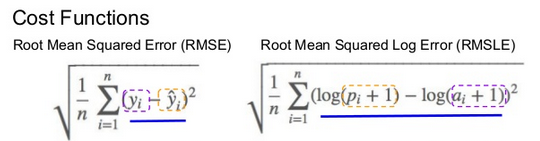

Root Mean Squared Error (RMSE) and Root Mean Squared Logarithmic Error (RMSLE) both are the techniques to find out the difference between the values predicted by your machine learning model and the actual values.

To understand these concepts and their differences, it is important to know what does Mean Squared Error (MSE) mean. MSE incorporates both the variance and the bias of the predictor. RMSE is the square root of MSE. In case of unbiased estimator, RMSE is just the square root of variance, which is actually Standard Deviation.

In case of RMSLE, you take the log of the predictions and actual values. So basically, what changes is the variance that you are measuring. I believe RMSLE is usually used when you don't want to penalize huge differences in the predicted and the actual values when both predicted and true values are huge numbers.

    If both predicted and actual values are small: RMSE and RMSLE is same.
    If either predicted or the actual value is big: RMSE > RMSLE
    If both predicted and actual values are big: RMSE > RMSLE (RMSLE becomes almost negligible)

The Robustness of RMSLE to the outliers, the property of calculating the relative error between the Predicted and Actual Values, the most unique property of the RMLSE that it penalizes the underestimation of the actual value more severely than it does for the Overestimation.

So we will take log of our SalePrice column, and after that we can apply RMSE it will be RMSLE because of we applied log

**df_raw["SalePrice"]** is a pandas **Series** and we can give Series to np.log() directly

In [176]:
df_raw["SalePrice"] = np.log(df_raw.SalePrice) #We got a logarithm on this piece of code. We will create all RMSLE in later lines of code.

In [177]:
df_raw["SalePrice"] # The label is our" y " values.

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
401120     9.259131
401121     9.305651
401122     9.350102
401123     9.104980
401124     8.955448
Name: SalePrice, Length: 401125, dtype: float64

* Now we will create Random Forest. Random Forest can be used for categorical variables as well as continuous variables. It can predict with columns of various kinds like pixel data, floats, zip codes etc...

    * It generally does not suffer from overfitting

    * It does not assume our data is normally distributed

    * It does not assume relationship is linear

    * It requires few feature engineering

    * It is very good model to try first !

In [178]:
# returns error, not all data is numeric, there is categorical data.
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Low'

We cannot apply random forest to our data yet because our model does not know how to create model using string ! We have to pass numbers to our model

* So we will convert everything to numbers

* Some numerical columns can also be categorical variables ! Like Zip codes where the meaning of the entries are not related to continuous numbers but categories (like zip code of different cities etc)

## 2) Pre-processing

### Feature Engineering

We will do our first feature engineering on sale date column, because it might contain lots of relevant features 

* If we do not tell our model what is on that day, there is no way our model can figure out that by itself, so it is very very important information to feed into our model

In [179]:
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [180]:
df_compare = df_raw.copy()

In [181]:
df_compare.drop("saledate", axis=1, inplace=True)

In [182]:
# this will delete "date" or "Date" from the name
re.sub('[Dd]ate$', '', "saledate")

'sale'

In [183]:
# Accessing datetime attribute of Series
df_raw["saledate"].dt

In [184]:
df_raw["saledate"].dt.year # The year part is.

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
401120    2011
401121    2011
401122    2011
401123    2011
401124    2011
Name: saledate, Length: 401125, dtype: int64

In [185]:
# dt_name is the name of the column that is of type datepart
def add_datepart(df, dt_name, drop=True, time=False):
    "Creates new columns from our datetime column"
    
    
    dt_column = df[dt_name]
    column_dtype = dt_column.dtype
    

    targ_name = re.sub('[Dd]ate$', '', dt_name)

    # attributes are normally in lower case but we wrote this way because we will use it in columns' name too
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    
    if time: 
        attr = attr + ['Hour', 'Minute', 'Second']
        
    
    #Sorry curse of dimensionality, maybe another time
    for a in attr: 
        df[targ_name + a] = getattr(dt_column.dt, a.lower())
        
    # how much time passed, we will divide by 10^9 because it is in the nanosecond format
    df[targ_name + 'Elapsed'] = dt_column.astype(np.int64) // 10 ** 9
    
    if drop: 
        df.drop(dt_name, axis=1, inplace=True)

In [186]:
display_all(df_raw.head().T)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,11.0974,10.9508,9.21034,10.5584,9.30565
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [187]:
add_datepart(df_raw, "saledate")

In [188]:
display_all(df_raw.head().T)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,11.0974,10.9508,9.21034,10.5584,9.30565
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


### Creating Mapping For Categorical Variables

* Now we will convert columns that are strings to pandas category type so that we will be able to feed them into our models

In [189]:
df_raw.items()

<generator object DataFrame.items at 0x7f519ee92138>

raw.items() will create column name, Series(of the column) generator that when we use next() we will get tuple

In [190]:
a = df_raw.items()

In [191]:
next(a)

('SalesID',
 0         1139246
 1         1139248
 2         1139249
 3         1139251
 4         1139253
            ...   
 401120    6333336
 401121    6333337
 401122    6333338
 401123    6333341
 401124    6333342
 Name: SalesID, Length: 401125, dtype: int64)

In [192]:
next(a)

('SalePrice',
 0         11.097410
 1         10.950807
 2          9.210340
 3         10.558414
 4          9.305651
             ...    
 401120     9.259131
 401121     9.305651
 401122     9.350102
 401123     9.104980
 401124     8.955448
 Name: SalePrice, Length: 401125, dtype: float64)

In [193]:
next(a)

('MachineID',
 0          999089
 1          117657
 2          434808
 3         1026470
 4         1057373
            ...   
 401120    1840702
 401121    1830472
 401122    1887659
 401123    1903570
 401124    1926965
 Name: MachineID, Length: 401125, dtype: int64)

In [194]:
type(next(a))

tuple

In [195]:
b = next(a)

In [196]:
b

('datasource',
 0         121
 1         121
 2         121
 3         121
 4         121
          ... 
 401120    149
 401121    149
 401122    149
 401123    149
 401124    149
 Name: datasource, Length: 401125, dtype: int64)

In [197]:
b[0]

'datasource'

In [198]:
b[1]

0         121
1         121
2         121
3         121
4         121
         ... 
401120    149
401121    149
401122    149
401123    149
401124    149
Name: datasource, Length: 401125, dtype: int64

In [199]:
type(b[1])

pandas.core.series.Series

In [200]:
len(b[1])

401125

In [201]:
b[1].dtype

dtype('int64')

In [202]:
# It will convert columns that have string dtypes to pandas category type
# in the background, these categorical variables are converted to numeric variables.
def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype("category").cat.as_ordered()

Mapping that we are using for training set must be equal to validation and test sets'

Like in test set, lets say, mapping is blue --> 1
but in validation set blue --> 2

so that is a problem, we cannot decide our models accuracy etc in this case, we must use same mapping for them


In [203]:
# after applying train_cats to the trainset, this is applied to validation and train so that I have the same category changes.
def apply_cats(df, train):
    for n, c in df.items():
        if train[n].dtype == "category":
            df[n] = pd.Categorical(c, categories = train[n].cat.categories, ordered = True)
            

In [204]:
df = df_raw.copy()

In [205]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


train_cats will not change how our df looks but it will store corresponding numbers at the back of the scene

In [206]:
train_cats(df)

In [207]:
train_cats(df_compare)

In [208]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [209]:
df["UsageBand"]

0            Low
1            Low
2           High
3           High
4         Medium
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: UsageBand, Length: 401125, dtype: category
Categories (3, object): [High < Low < Medium]

In [210]:
df["UsageBand"].cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [211]:
# reordering categories, inplace will change existing df
df["UsageBand"].cat.set_categories(["High", "Medium", "Low"], ordered = True, inplace = True)

In [212]:
df["UsageBand"].cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

In [213]:
# this will be the thing the random forest algorithm will see
# -1 is for missing value
# We will add 1 to all the values to 0 to represent missing values
df["UsageBand"].cat.codes

0         2
1         2
2         0
3         0
4         1
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [214]:
df_compare["UsageBand"].cat.set_categories(["High", "Medium", "Low"], ordered = True, inplace = True)

### Very Fast Way to Save and Load Your File

In [215]:
import os
!pip3 install pyarrow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [216]:
# feather is fast way to write to the disk and read it back
os.makedirs('tmp', exist_ok=True) # Don't give error if file is already there 
df.to_feather('tmp/bulldozers_1')

In the future we can simply read it from this fast format.

### Handling Missing Values

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [217]:
df = pd.read_feather("tmp/bulldozers_1")

In [218]:
d = {"a":[1,2,3,4,4,np.nan], "b":[1,2,3,3,4,5]}

In [219]:
df_t = pd.DataFrame.from_dict(d)

In [220]:
df_t

,a,b
0,1.0,1
1,2.0,2
2,3.0,3
3,4.0,3
4,4.0,4
5,NaN,5


In [221]:
df_t.isnull()

,a,b
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,True,False


In [222]:
df_t.isnull().sum()

a    1
b    0
dtype: int64

In [223]:
display_all(df.isnull().sum().sort_index()/len(df))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [224]:
pd.isnull(df["UsageBand"])

0         False
1         False
2         False
3         False
4         False
          ...  
401120     True
401121     True
401122     True
401123     True
401124     True
Name: UsageBand, Length: 401125, dtype: bool

In [225]:
pd.isnull(df["UsageBand"]).sum()

331486

In [226]:
# Missing of the entry can also be a valuable information
# So we will create a column that is False when value is missing
# We encoded missingness in categorical columns so we will just create _na columns for numerical types
def fix_missing(df, col, name):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum:
            df[name+"_na"] = pd.isnull(col)
        df[name] = col.fillna(col.median())

In [227]:
# We will have codes starting from 0 (for missing)
def numericalize(df, col, name):
    if not is_numeric_dtype(col):
        df[name] = col.cat.codes+1

In [228]:
def proc_df(df, y_fld):
    
    y = df[y_fld].values
    df.drop([y_fld], axis = 1, inplace = True)
    
    for n, c in df.items():
        fix_missing(df, c, n)
        numericalize(df, c, n)
    
    res = [df, y]
    
    return res

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [229]:
df = pd.read_feather("tmp/bulldozers_1")

In [230]:
df, y = proc_df(df, 'SalePrice')

In [231]:
df_compare, y_compare = proc_df(df_compare, 'SalePrice')

In [232]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [233]:
y

array([11.09741002, 10.95080655,  9.21034037, ...,  9.35010231,
        9.10497986,  8.95544812])

In [234]:
display_all(df.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,0,0,0,0,0
fiModelDesc,657,657,657,483,483
fiBaseModel,207,207,207,159,159


* Now all the missing values were handled and all the values are numerical so now we have something we can pass to a random forest!

## 3) Creating Random Forest 

### Base model

n_jobs=-1 will paralellize model so that it will distribute it to all of our cpu. -1 means use all processors.

score is r^2 by default

In [235]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9881639839025574

* Wow 0.98, but don't be happy too easy ! We might be overfitting !

So to test if we are doing great or it is just overfitting, we must have another dataset to check the result

In [236]:
# Creating validation set
# It will split our data set to have length n train and len(df) - n validation set
def split_train_val(df,n): 
    
    return df[:n].copy(), df[n:].copy()

**Explain why to choose validation set that way**

In [237]:
n_valid = 12000  # same as Kaggle's test set size
n_train = len(df)-n_valid
X_train, X_valid = split_train_val(df_compare, n_train)
y_train, y_valid = split_train_val(y_compare, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 58), (389125,), (12000, 58), (12000,))

In [238]:
# We had a logarithm earlier in the code.
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [239]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")
    print(f"R^2 of train set {m.score(X_train, y_train)}")
    print(f"R^2 of validation set {m.score(X_valid, y_valid)}")

**Explain R^2**

Coefficient of determination

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

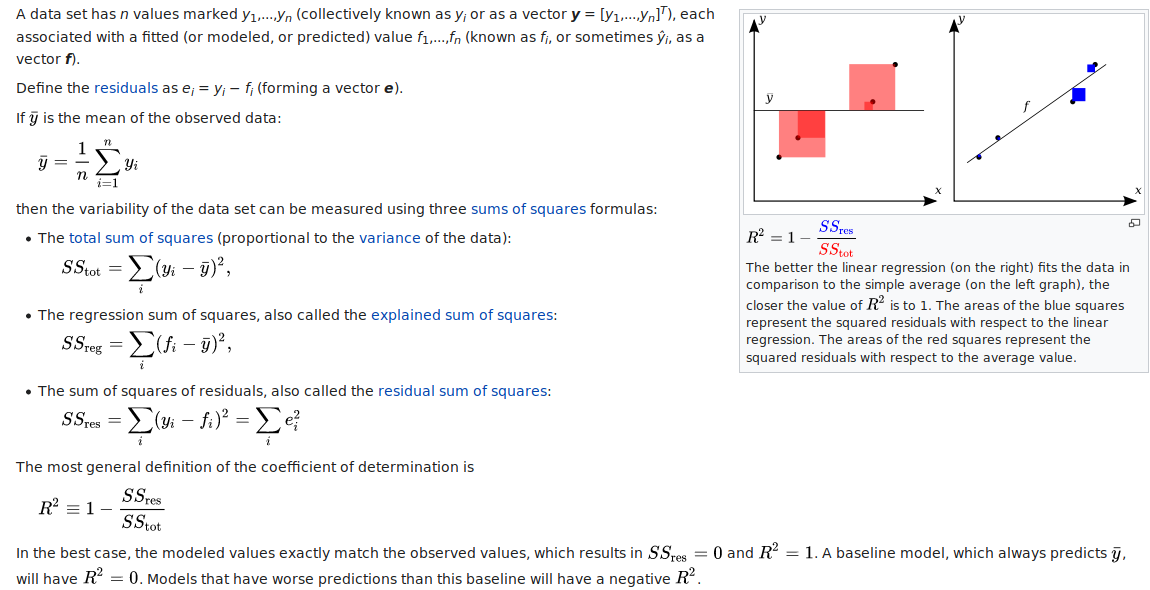

In [240]:
# with df_compare, so we don't have additional columns coming from date-time
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 14min 35s, sys: 1.04 s, total: 14min 36s
Wall time: 1min 54s
RMSE of train set 0.09839823640971919
RMSE of validation set 0.24623680269735748
R^2 of train set 0.9797647089487577
R^2 of validation set 0.8917185904133185


In [241]:
n_valid = 12000  # same as Kaggle's test set size
n_train = len(df)-n_valid
X_train, X_valid = split_train_val(df, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 84), (389125,), (12000, 84), (12000,))

In [242]:
# with df, so we have additional columns coming from date-time
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 21min 38s, sys: 1.29 s, total: 21min 39s
Wall time: 2min 50s
RMSE of train set 0.0756060306244728
RMSE of validation set 0.23533293494338864
R^2 of train set 0.9880533070480713
R^2 of validation set 0.9010961047576367


So we can say that additional columns actually helped !

## Trying Different Things Fast

* In machine learning, trying different ideas fast is very important

We will create subset of our data so that we can try new things fast

In [243]:
def get_sample(df,n):

    idxs = np.random.permutation(len(df))[:n]
    return idxs, df.iloc[idxs].copy()

In [244]:
def proc_df(df, y_fld):

    
    y = df[y_fld].values
    df.drop([y_fld], axis = 1, inplace = True)
    
    for n, c in df.items():
        fix_missing(df, c, n)
        
    for n, c in df.items():
        numericalize(df, c, n)
    
    res = [df, y]
    

    
    return res

In [245]:
df = pd.read_feather("tmp/bulldozers_1")

In [246]:
df, y = proc_df(df, 'SalePrice')

**We don't want to change our validation set!!**

In [247]:
n_valid = 12000  # same as Kaggle's test set size
n_train = len(df)-n_valid
X_train, X_valid = split_train_val(df, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 84), (389125,), (12000, 84), (12000,))

In [248]:
# Creating subset
idxs, X_train = get_sample(X_train, 3000)
y_train = y_train[idxs]

In [249]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 8.12 s, sys: 28 ms, total: 8.15 s
Wall time: 1.2 s
RMSE of train set 0.1184227766887485
RMSE of validation set 0.3357843226113428
R^2 of train set 0.970579452912688
R^2 of validation set 0.7986420388537205


* Much faster than the full dataset, experimenting different ideas fast if very important !

## Single tree

In [250]:
from sklearn import tree
import matplotlib.pyplot as plt

max_depthint, default=None 
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

bootstrapbool, default=True
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

n_jobsint, default=None
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

n_estimatorsint, default=100
The number of trees in the forest.

In [251]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
t = m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.5399626433031119
RMSE of validation set 0.5703077163856104
R^2 of train set 0.3883433609917789
R^2 of validation set 0.4191466887976285


### Plotting a Tree

In [252]:
estimator = m.estimators_[0]

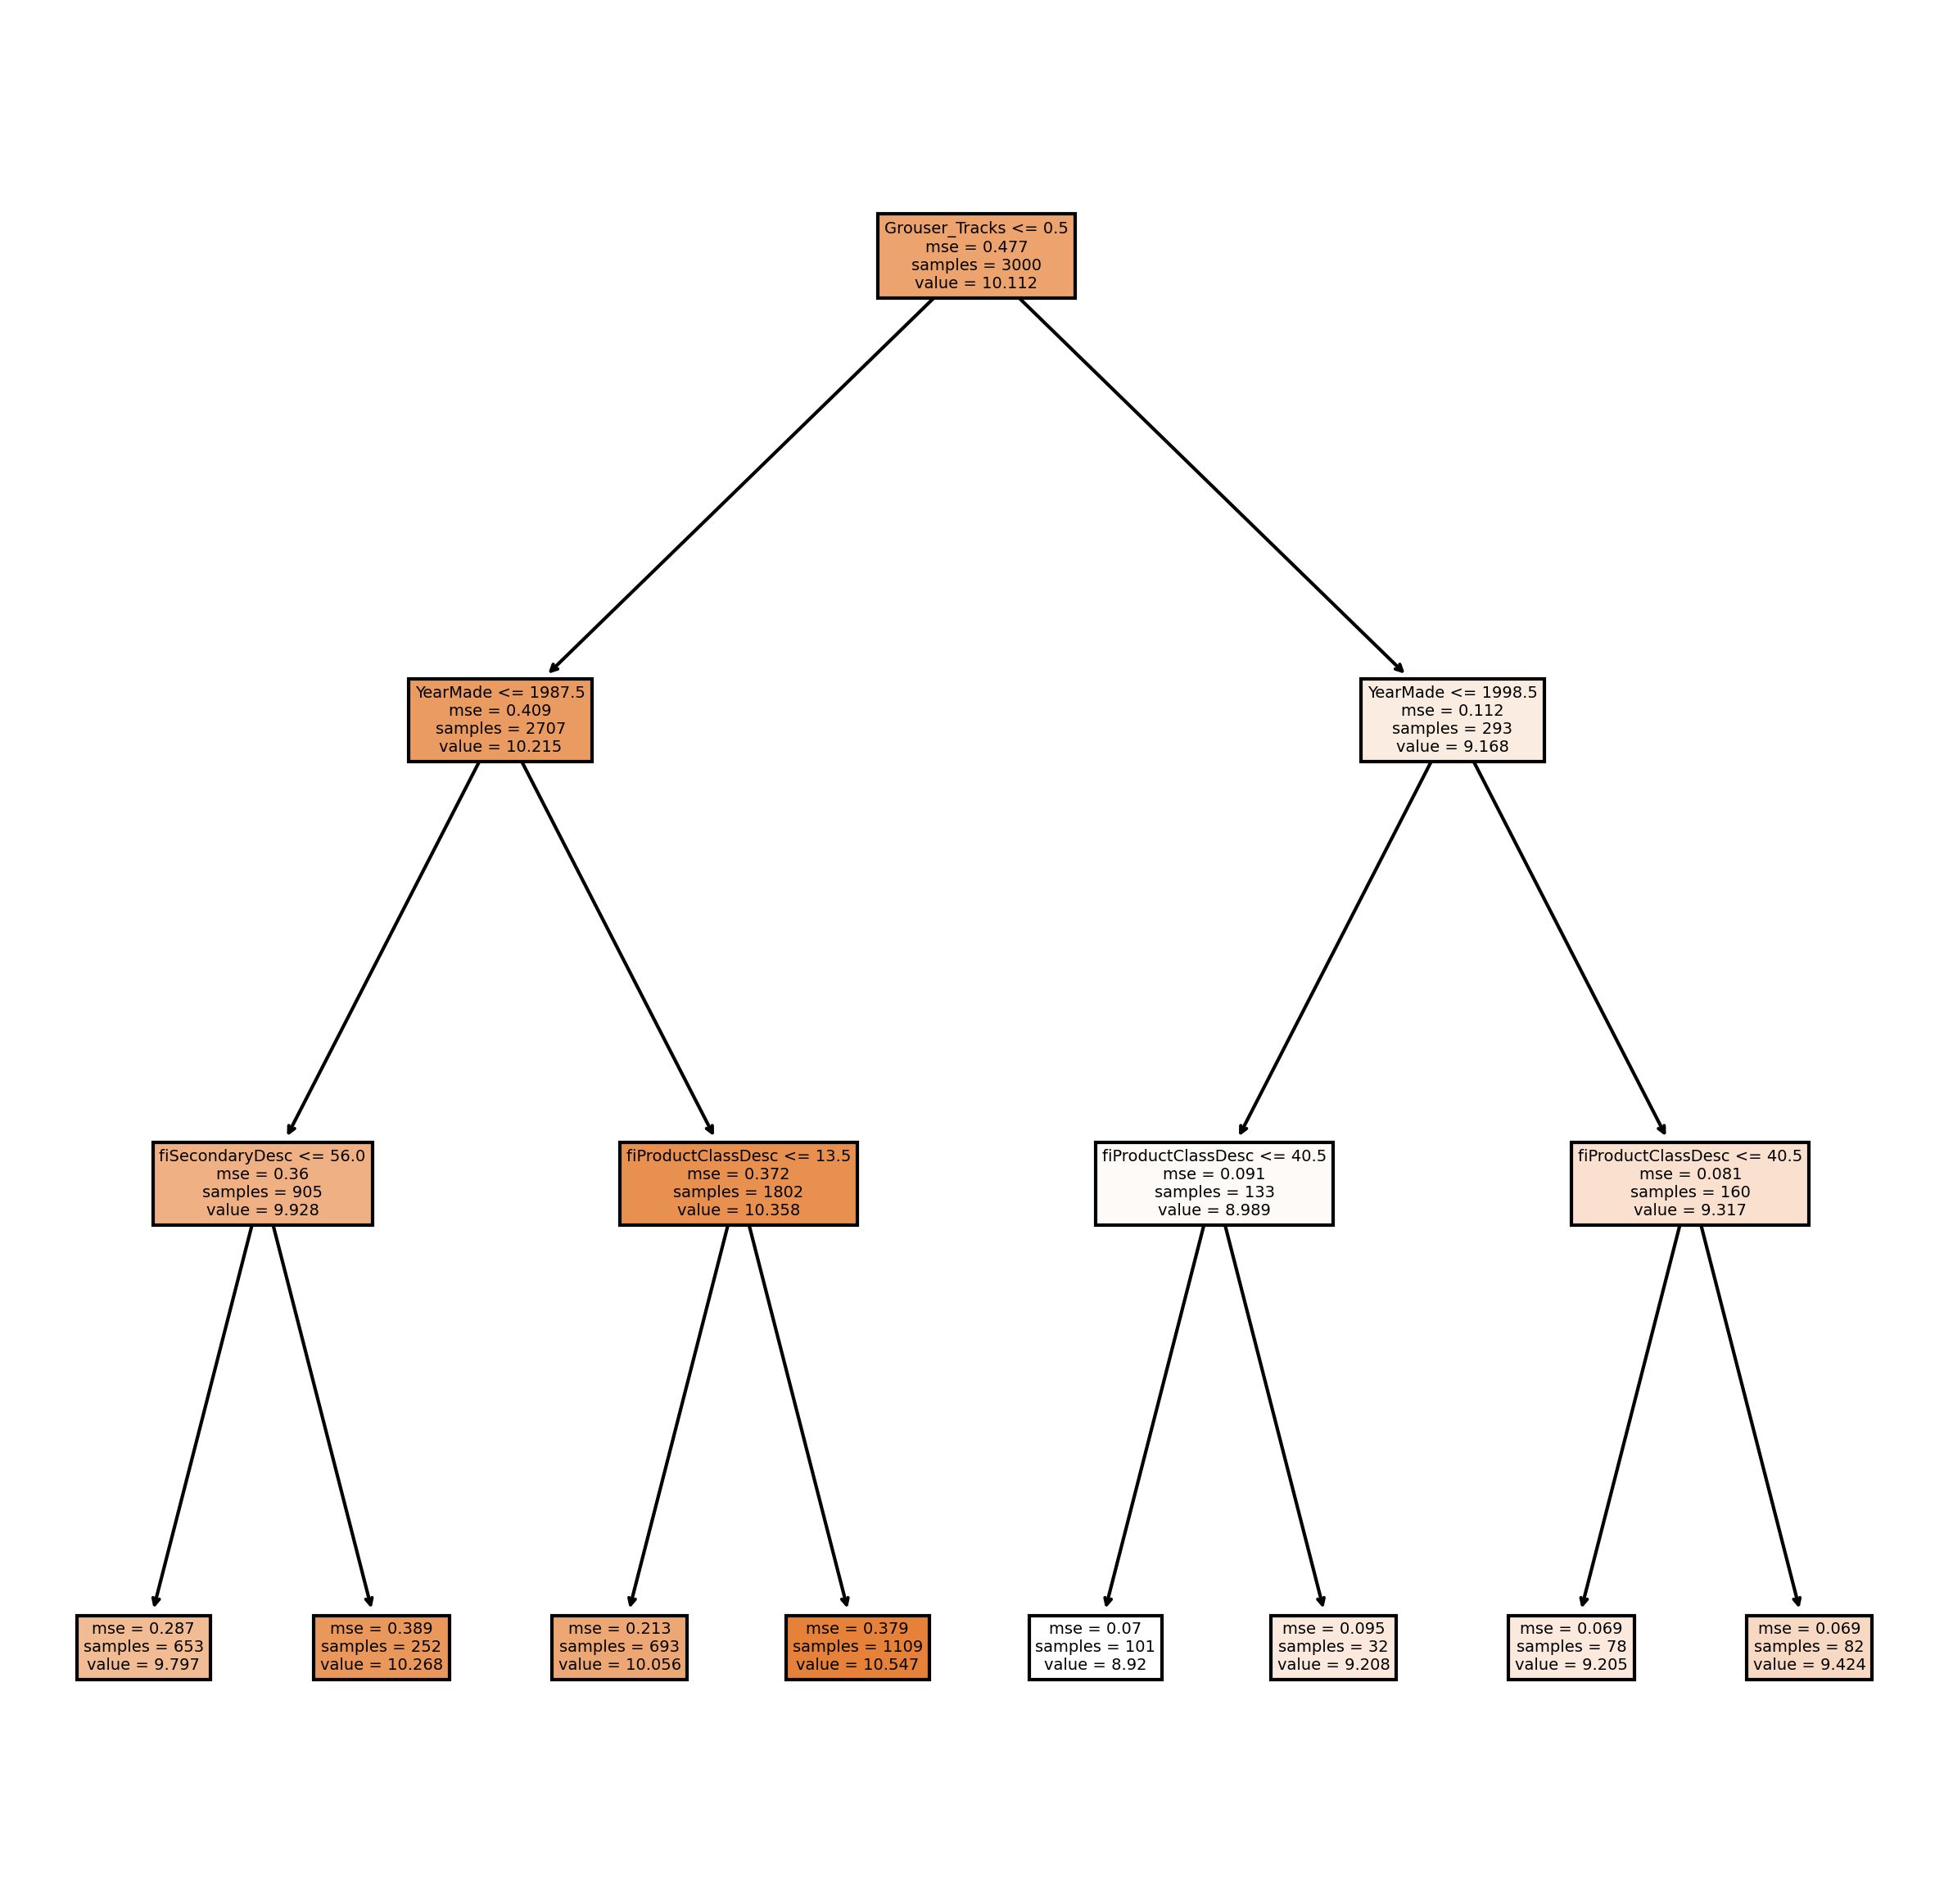

In [253]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(estimator, feature_names=df.columns,filled=True);

Tree consists of binary decisions/splits

The most important binary decision to split your data is the first split !

**How to decide where to split?**

**When does decision tree stop?** 

* Max depth 

* 1 elements per leaf nodes

### Creating Tree with Maximum Depth

Let's see what happens if we create a bigger tree.

In [254]:
# If we do not specify max_depth, model will memorize data and overfit
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.0
RMSE of validation set 0.47112854657077446
R^2 of train set 1.0
R^2 of validation set 0.6036062361011633


**Why is R^2 of the training set 1?**

We will use *bagging* of multiple trees to decrease variance and  get more generalizable results.

## Bagging

### Intro

You can apply bagging to any model you want

We want to create different models that are not **correlated** with eachother and then we will take the mean of their prediction

So different models will found different insights, patterns about our data

So if we average out those models, we will combine their predictive power into 1 and make better prediction

This averaging of different models is called **Ensembling**

**Problem**:The problem is this: If we try to create, let's say, 10 different trees, each will split our data at the same splits, they will be identical models !



So we will create subsets of the data and fit different trees to different subsets, so trees will learn the patterns at different subsets

If we apply Boostrap to sample from our data, it will be like sampling from population. Each subset has different characteristic than others if population is not perfectly homogenous. So each tree will learn different patterns. 

Errors will be random, and error of the random errors will be zero

The important part is to create models that their errors are not correlated with each other

Being not correlated is generally more important than being more predictive for a single tree

In practice if your trees are not good at predicting, you need to have more trees

**Explain Boostrap**

In [255]:
import matplotlib.pyplot as plt

In [256]:
# This model consists of bunch of trees 
# But selection of features are not random
# It only uses bootstap
# It will create 10 trees by default
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.11753583428636612
RMSE of validation set 0.33593304633367477
R^2 of train set 0.971018500417578
R^2 of validation set 0.7984636306589368


We can gain insight by looking at the subset of our data, that is what I mean by experiment faster, once you have found the things that makes your model better, you can try it on whole set too, but trying them before hand will cost you too much time, so we will should try to create subsample that is representative of the whole set so that we can experiment on that.

We'll grab the predictions for each individual tree, and look at one example.

### Predictions of Individual Trees

In [257]:
#preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds = np.array([t.predict(X_valid) for t in m.estimators_]) # list of arrays of predictions
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([10.46310334,  9.47270464,  9.10497986,  8.9226583 ,  9.43348392,
         9.680344  ,  9.680344  , 10.53209621,  8.9226583 , 10.41930072,
         9.76995616,  9.47270464,  9.25913054,  9.35010231,  9.30565055,
         9.43348392,  9.35010231,  8.93590353,  8.9226583 ,  8.9226583 ,
         9.10497986,  9.39266193,  9.21034037,  8.98719682,  9.680344  ,
         9.47270464,  9.61580548,  9.680344  ,  9.30565055,  9.43348392,
         9.680344  ,  8.98719682,  9.35010231,  9.45328655,  9.43348392,
         9.47270464,  8.9226583 ,  9.07680898,  8.9226583 ,  9.07680898,
         8.9226583 ,  9.10497986,  9.45328655,  8.9226583 ,  8.98719682,
        10.59663473,  9.58190393,  9.21034037, 10.40426284,  8.98719682,
         9.47270464, 10.34174248,  9.76995616,  9.35010231,  9.6485953 ,
         9.35010231,  9.35010231,  8.93590353,  9.680344  ,  8.9226583 ,
         9.54681261,  8.93590353,  9.30565055,  8.93590353,  9.95227772,
        10.04324949,  9.680344  ,  9.43348392,  9.4

* preds[:,0] is 10 predictions, 1 for each trees

* np.mean(preds[:,0]) is our overall prediction for first input after applying mean

* y_valid[0] is the actual output

**------------------------------------------------------------------------**

array([9.07680898, 9.21034037, 9.04782144, 9.15904708, 8.9226583 ,
        9.21034037, 9.54681261, 9.07680898, 9.04782144, 8.98719682]
        
Single values may not close to actual value but mean of them converges to the true value

**------------------------------------------------------------------------**

* Here we can see that averaging number errors gives us a closer estimation for true value

**preds is list of arrays of predictions !**

Each array is all of the prediction of corresponding tree !

In [258]:
preds.shape # (number of trees, size of the validation set)

(100, 12000)

### Exploring Effect of Adding More Trees on $R^2$

metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) will produce 1 number

**Show by plotting np.mean(preds[:i+1], axis=0)**

In [259]:
y_valid.shape

(12000,)

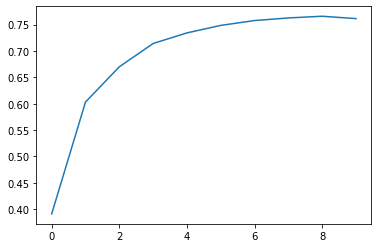

In [260]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

As we add more and more trees it will increase the R^2. But after certain point it flattens out. So it seems that if we increase the number of the trees to like 20, it will not improve R^2 that much. So let's try out and see

In [261]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.13095540504867742
RMSE of validation set 0.3535981376491032
R^2 of train set 0.9640228198393803
R^2 of validation set 0.7767107001420561


In [262]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.12166850827014894
RMSE of validation set 0.3357066423874658
R^2 of train set 0.9689446354735731
R^2 of validation set 0.7987351922334047


In [263]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.1186978583094024
RMSE of validation set 0.3360616504954578
R^2 of train set 0.9704426135041826
R^2 of validation set 0.7983092940894181


* So there might be a point that we might not want to add more trees

* It does not get worst but it will not add much !

**At first you can use 20-30 trees to explore new things, what to do etc, and then you can try fitting with more trees. Small number of trees are good for experimenting, because it will take less time**

### Out-of-bag (OOB) score

Sometimes your dataset is small and you don't want to create validation set and loss data for training

After applying boostrap, each tree is seeing only the subset of our data. So we can use data that is not in our subset as a validation set for specific trees (please see that every tree will have different validation set because each of them will have different subset)(it is also possible that some trees have same subset by chance)

We will feed rows of data to trees that are not using that rows as "validation set" so it is most likely not full forest, but has fewer trees. So in general OOB score is lower than validation score since averaging more trees results in higher predictive power.

So we will average all the prediction of trees that that row is not available for their training

* **Explain why OBB score is generally lower**

In [264]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")
    print(f"R^2 of train set {m.score(X_train, y_train)}")
    print(f"R^2 of validation set {m.score(X_valid, y_valid)}")
    if hasattr(m, "oob_score_"):
        print(f"OOB score: {m.oob_score_}")

In [265]:
m = RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.12375651404258212
RMSE of validation set 0.3400600181751146
R^2 of train set 0.9678695801881206
R^2 of validation set 0.793481424206022
OOB score: 0.7734950331486569


This shows that our validation set time difference is making an impact, as is model over-fitting.

## Reducing over-fitting

### Subsampling

`df_trn, y_trn = proc_df(df, 'SalePrice', subset=30000)
X_train, _ = split_train_val(df_trn, 20000)
y_train, _ = split_train_val(y_trn, 20000)`

We did something like this to speed things up and experiment faster, but we took random 30000 data point in our dataset statically. But rather than randomly sample (bootstrap) subset of same 30000 rows each time, let's randomly sample 3000 (or whatever you specify, we are using 3000 to refer previously used number) rows among entire rows each time we want to train a tree, so that our model can see more data

So we will return using our full dataset

In [266]:
df = pd.read_feather("tmp/bulldozers_1")

In [267]:
n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid

In [268]:
df_trn, y_trn = proc_df(df, 'SalePrice')
X_train, X_valid = split_train_val(df_trn, n_trn)
y_train, y_valid = split_train_val(y_trn, n_trn)

**The idea is that instead of limiting the total amount of data that the model can access we will limit the amount of data that individual trees can access. In that way, our model can still see all the data and at the same time we can experiment faster!**

In [269]:
from sklearn.ensemble import forest

/home/demir/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


You can change the default behaviour of the methods in libraries. That is why you should not only memorize to use frameworks but be good at coding 

In [270]:
#def _generate_sample_indices(random_state, n_samples, n_samples_bootstrap):
#    """
#    Private function used to _parallel_build_trees function."""
#
#    random_instance = check_random_state(random_state)
#    sample_indices = random_instance.randint(0, n_samples, n_samples_bootstrap)
#
#    return sample_indices

In [271]:
np.random.mtrand._rand.randint(0,10,3)

array([0, 0, 7])

rs is in None if we don't specify otherwise

randint(0, n_samples, n)) will sample n random data point 

In [272]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

In [273]:
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

**So after doing this, if we use enough trees, it will eventually see all the data**

**We now can experiment fast and at the same time use all the data we have !!**

With a random forest using this approach that each tree will see subset of our data

In [274]:
set_rf_samples(20000)

In [275]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 21min 46s, sys: 2.92 s, total: 21min 49s
Wall time: 3min 50s
RMSE of train set 0.0756422868835365
RMSE of validation set 0.23473992710952712
R^2 of train set 0.9880418464212931
R^2 of validation set 0.9015939261831565


This model is not better than our first model, but this is because we haven't use many estimators yet!

**Since each additional tree allows the model to see more data, this approach can make additional trees more useful.**

Now that we change the method, it is not compatible with OOB score, so this approach is not compatible with OOB score, but if you go and change how it will calculate OOB score, it will be compatible

In [276]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.0784699685650455
RMSE of validation set 0.237850710083407
R^2 of train set 0.9871310894149714
R^2 of validation set 0.8989684819339919


In [277]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 21min 57s, sys: 2.85 s, total: 22min
Wall time: 3min 46s
RMSE of train set 0.07577843909420112
RMSE of validation set 0.2361460376657514
R^2 of train set 0.9879987595611134
R^2 of validation set 0.9004114750856482


**So the take away is this: Do not use all of your data when you are experimenting ! It will slow down your progress. Use subsample method to experiment faster !**

Using all the data, most of the time, is not necessary for gaining insight about your model/data. Use sufficient subsample size

* We want to choose sample size small because it will be easier to experiment but at the same time we want it to be large enough so that it will represent our data well

* **How to understand the number you chose for sample size is enough?**

* Try different values and choose the one that gives you the stable answers when you re-run several times

### Tree building parameters

We revert to using a full bootstrap sample and explore impact of other over-fitting avoidance methods.

In [278]:
reset_rf_samples()

Let's get a baseline for this full set to compare to.

### Using Bootstraping and More Trees than Default

In [279]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 8min 46s, sys: 972 ms, total: 8min 47s
Wall time: 1min 39s
RMSE of train set 0.07833138618809678
RMSE of validation set 0.23544151626572768
R^2 of train set 0.987176503716879
R^2 of validation set 0.9010048162754958
OOB score: 0.9084783653550503


* Why is OBB score higher than validation set score?

#### Profiling

**Looking which things are taking up time is called profiling. Datascientists are usually overlook this tool but this is very handy if you want your model to run fast, train fast etc**

**%prun will tell you which line of code is taking longest time to be executed**

In [280]:
%prun m.fit(X_train, y_train)

* **practical tip**: Inside the random forest code np.array(X_train, dtype=np.float32) will be done. 

In [281]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDay_na,saleDayofweek_na,saleDayofyear_na,saleIs_month_end_na,saleIs_month_start_na,saleIs_quarter_end_na,saleIs_quarter_start_na,saleIs_year_end_na,saleIs_year_start_na,saleElapsed_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,False,False,False,False,False,False,False,False,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,False,False,False,False,False,False,False,False,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,False,False,False,False,False,False,False,False,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,False,False,False,False,False,False,False,False,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389120,4364560,1789509,11980,172,1.0,1998,5388.0,3,3682,1377,...,False,False,False,False,False,False,False,False,False,False
389121,4364561,1789509,16467,172,1.0,2003,7426.0,3,3702,1379,...,False,False,False,False,False,False,False,False,False,False
389122,4364563,1789509,216,172,1.0,2003,4223.0,3,2091,689,...,False,False,False,False,False,False,False,False,False,False
389123,4364737,2296205,665,172,1.0,1999,2552.0,3,3232,1111,...,False,False,False,False,False,False,False,False,False,False


In [282]:
np.array(X_train, dtype=np.float32)

array([[1.139246e+06, 9.990890e+05, 3.157000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.139248e+06, 1.176570e+05, 7.700000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.139249e+06, 4.348080e+05, 7.009000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [4.364563e+06, 1.789509e+06, 2.160000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.364737e+06, 2.296205e+06, 6.650000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.364741e+06, 2.282910e+06, 6.650000e+02, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [283]:
%time X_train = np.array(X_train, dtype=np.float32)

CPU times: user 1.41 s, sys: 35.9 ms, total: 1.44 s
Wall time: 1.44 s


In [284]:
%time m.fit(X_train, y_train)

CPU times: user 8min 49s, sys: 938 ms, total: 8min 50s
Wall time: 1min 37s


RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)

* It can save your time, especially when you are experimenting different things, you will create lots of models with different parameters, if we convert it beforehand models will not convert it everytime you create new one, so it will save us time

### Using min_sample_leaf

`min_samples_leaf`:The minimum number of samples required to be at a leaf node.

We can grow our trees less deeply to reduce over-fitting. We do this by setting `min_samples_leaf`
- There are less decision rules for each leaf node; Our model will not memorize the data, it will be so called simpler, and not specialized to our data, that kind of models should generalize better
- The predictions are made by averaging more rows in the leaf node, it will also help our model generalize better

In [285]:
# It will train more quickly because it will be less deep
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 7min 54s, sys: 883 ms, total: 7min 54s
Wall time: 1min 27s
RMSE of train set 0.11509005213080475
RMSE of validation set 0.23434662141940096
R^2 of train set 0.9723171754872336
R^2 of validation set 0.9019234077957651
OOB score: 0.9083721129273256


It increases our R^2 of validation set ! It generalizes better as we thought it would !

If you are using big dataset, you can set min_sample_leaf to 10-10000

The only way to know which one is better is to try and experiment !

- generally try these values first: 1, 3, 5, 10, 25, 100

In [286]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.14066200238619375
RMSE of validation set 0.23441072977617056
R^2 of train set 0.9586487714443842
R^2 of validation set 0.9018697403766184
OOB score: 0.9070152320252995


### Using max_features to Add Randomness to Split

It will make our trees to learn specific things, patterns in our model better

It will also increase the amount of variation amongst the trees. It will also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

We said that less correlated our trees are the better.

Suppose that some features are too much important at deciding than others, so regardless of our different subset, all trees will use those features in first splits, and that makes our trees similar, more correlated

But we want our trees to learn different patterns in our data. We don't want them to learn same things ! The reason we are averaging all the trees we have is to gain knowledge from them, but if all of them learn same things, it will be much less informative. **So we want our trees to learn different things and for that reason randomizing the features that they can use will create more unique trees that can learn different things**

So every individual splits will be based on different subset of features. At every decision point, we will use different subset of features to decide splitting

- None: Use all of them
- 0.5 : Use half of them
- 'sqrt' Use sqrt of the amount

In [287]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.11906999504936737
RMSE of validation set 0.228585167842388
R^2 of train set 0.970369464714366
R^2 of validation set 0.9066865883627027
OOB score: 0.9119120645989692
